In [8]:
# Logistic Regression

In [5]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score


In [6]:
# Load Cryotherapy Data

cryo = pd.read_csv("../Files/Cryotherapy.csv", sep = ',', header = 0)

In [11]:
cryo.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [9]:
# Describe Cryotherapy Data
cryo.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


In [12]:
# Check for missing data 
# Remember we can use the isnull(), sum(), and sort_values() functions)
total = cryo.isnull().sum().sort_values(ascending=False)
print(total)

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
dtype: int64


In [13]:
print(cryo.shape)

(90, 7)


In [14]:
# Drop sensitive colums
# Remember to include the axis and if you want columns to be dropped in place or not
cryo.drop(cryo.columns[[0,1,2]], axis = 1, inplace=True)

In [15]:
# View dataset
cryo.head()

,Number_of_Warts,Type,Area,Result_of_Treatment
0,5,1,100,0
1,5,1,96,1
2,1,3,132,0
3,7,3,750,0
4,1,1,42,0


In [18]:
# Creating Array of Features
X = cryo.iloc[:,:3]
X.head()

,Number_of_Warts,Type,Area
0,5,1,100
1,5,1,96
2,1,3,132
3,7,3,750
4,1,1,42


In [21]:
# Create Target Array
y = cryo.iloc[:,-1]
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Result_of_Treatment, dtype: int64

In [22]:
# Split data into training and testing sets
# Remember to set the proportion and random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=23)

In [23]:
# Create Logistic Regression Classifier
classifier = LogisticRegression(solver='lbfgs',random_state=234)
classifier

LogisticRegression(random_state=234)

In [24]:
# Fit Classifier on Cryotherapy Data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=234)

In [25]:
# Testing Classifier with our remaining data
predicted_y = classifier.predict(X_test)
print(predicted_y)

[1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0]


In [26]:
# View patients who will probably respond positively to cryotherapy

for x in range(len(predicted_y)):
    if (predicted_y[x] == 1):
        print(x)

0
2
4
6
8
10
11
13
14
15
16
17
19
20
22
23
24
26
27
29
30
31
32
33
34


In [28]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy: 0.69


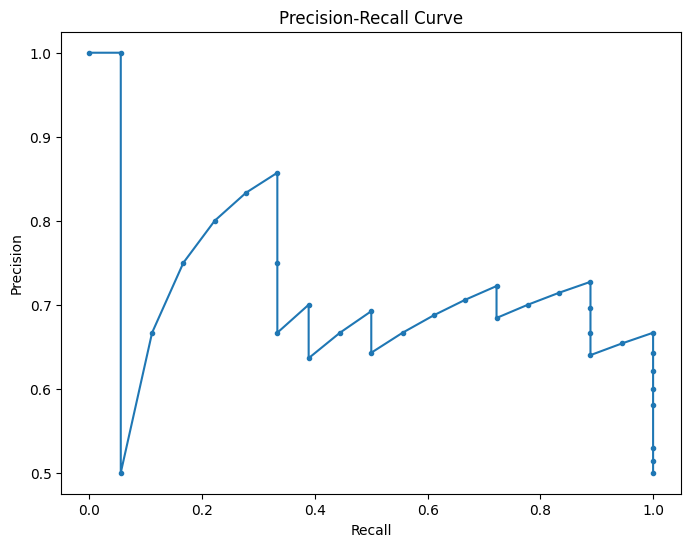

In [35]:
from sklearn.metrics import precision_recall_curve

y_scores = classifier.predict_proba(X_test)[:, 1]

# Obliczenie krzywej precyzja-pokrycie
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Narysowanie krzywej
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [38]:
# View Metrics
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, predicted_y)))
print('Precision = {:.5f}'.format(precision_score(y_test, predicted_y)))
print('Recall = {:.5f}'.format(recall_score(y_test, predicted_y)))
print('F1 score = {:.5f}'.format(f1_score(y_test, predicted_y)))

print('\nClassification Report')

# Print Classification report
print('\nClassification Report')
print(classification_report(y_test, predicted_y))

Accuracy = 0.69444
Precision = 0.64000
Recall = 0.88889
F1 score = 0.74419

Classification Report

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.64      0.89      0.74        18

    accuracy                           0.69        36
   macro avg       0.73      0.69      0.68        36
weighted avg       0.73      0.69      0.68        36



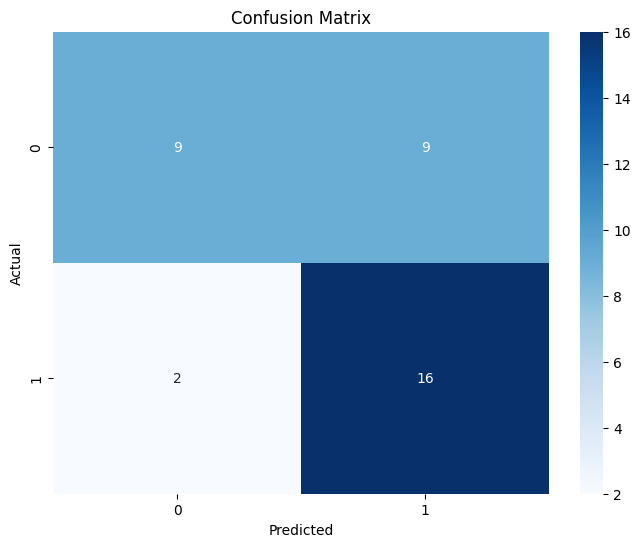

In [45]:
# Print Confusion Matrix
from sklearn.metrics import confusion_matrix

# Pobranie przewidywanych klas
y_pred = classifier.predict(X_test)

# Obliczenie macierzy pomyłek
cm = confusion_matrix(y_test, y_pred)

# Narysowanie macierzy pomyłek za pomocą heatmapy z Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()